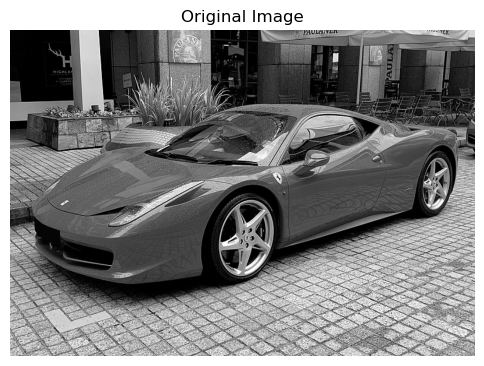

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

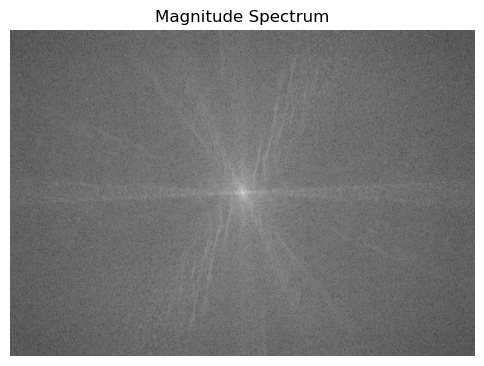

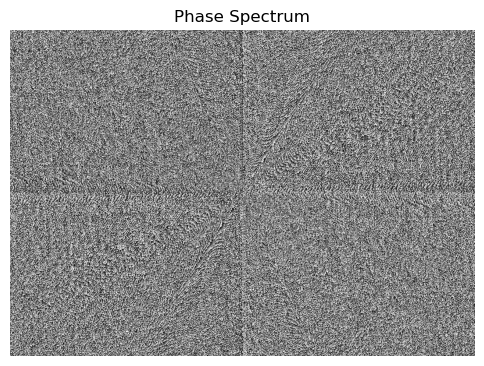

In [30]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')
plt.show()

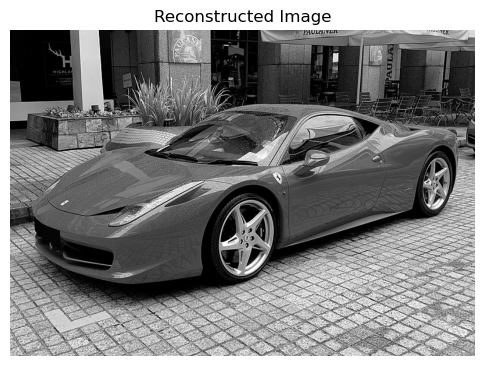

In [31]:
reconstructed_fshift = np.abs(fshift) * np.exp(1j * phase_spectrum)
reconstructed_f = np.fft.ifftshift(reconstructed_fshift)
reconstructed_image = np.fft.ifft2(reconstructed_f)
reconstructed_image = np.abs(reconstructed_image)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

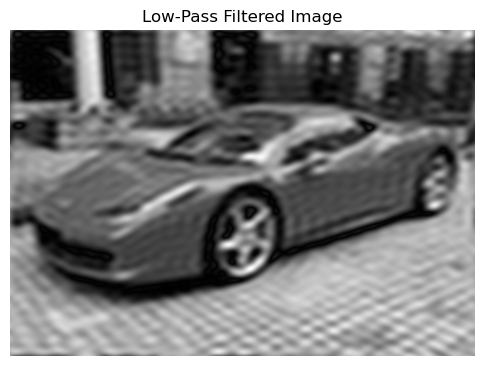

In [32]:
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
low_pass_filter = np.zeros((rows, cols), np.uint8)
low_pass_filter[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift_low_pass = fshift * low_pass_filter

reconstructed_f_low_pass = np.fft.ifftshift(fshift_low_pass)
reconstructed_image_low_pass = np.fft.ifft2(reconstructed_f_low_pass)
reconstructed_image_low_pass = np.abs(reconstructed_image_low_pass)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_low_pass, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')
plt.show()

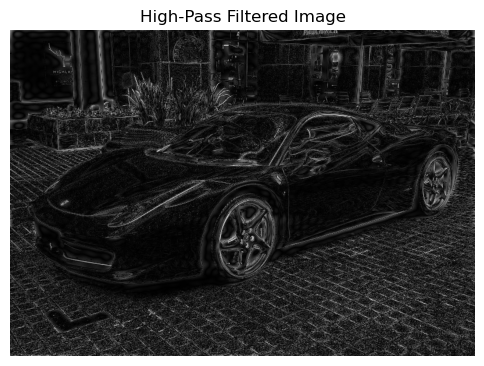

In [33]:
high_pass_filter = np.ones((rows, cols), np.uint8)
high_pass_filter[crow-30:crow+30, ccol-30:ccol+30] = 0

fshift_high_pass = fshift * high_pass_filter

reconstructed_f_high_pass = np.fft.ifftshift(fshift_high_pass)
reconstructed_image_high_pass = np.fft.ifft2(reconstructed_f_high_pass)
reconstructed_image_high_pass = np.abs(reconstructed_image_high_pass)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_high_pass, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')
plt.show()

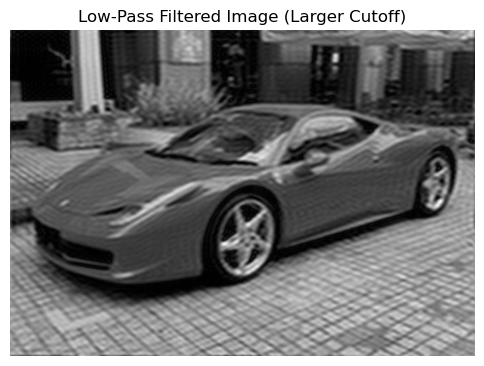

In [34]:
low_pass_filter_2 = np.zeros((rows, cols), np.uint8)
low_pass_filter_2[crow-60:crow+60, ccol-60:ccol+60] = 1
fshift_low_pass_2 = fshift * low_pass_filter_2

reconstructed_f_low_pass_2 = np.fft.ifftshift(fshift_low_pass_2)
reconstructed_image_low_pass_2 = np.fft.ifft2(reconstructed_f_low_pass_2)
reconstructed_image_low_pass_2 = np.abs(reconstructed_image_low_pass_2)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_low_pass_2, cmap='gray')
plt.title('Low-Pass Filtered Image (Larger Cutoff)')
plt.axis('off')
plt.show()

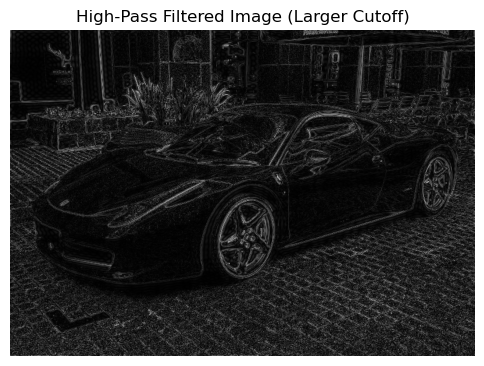

In [35]:
high_pass_filter_2 = np.ones((rows, cols), np.uint8)
high_pass_filter_2[crow-60:crow+60, ccol-60:ccol+60] = 0
fshift_high_pass_2 = fshift * high_pass_filter_2

reconstructed_f_high_pass_2 = np.fft.ifftshift(fshift_high_pass_2)
reconstructed_image_high_pass_2 = np.fft.ifft2(reconstructed_f_high_pass_2)
reconstructed_image_high_pass_2 = np.abs(reconstructed_image_high_pass_2)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_high_pass_2, cmap='gray')
plt.title('High-Pass Filtered Image (Larger Cutoff)')
plt.axis('off')
plt.show()